# Relatório Regressão Logística

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, KFold
from models.utils import accuracy, precision, recall, f1_score, confusion_matrix

from models.logistic_regression.logistic_regression import LogisticRegression

## Uso o SGD para treinar um modelo de regressão logística

### formula SGD:

${w}(t) = \mathbf{w}(t - 1) + \alpha e_i(t - 1) x_i$

a diferença é que temos um problema de classificação então o erro é o seguinte:

$e_i(t) = y_i - \sigma(w(t)^T x_i)$

a sigmoide retorna um valor entre 0 e 1.

## Objetivo:

Usa a regressão logística (implementada com SGD) para prever câncer de mama.

usando holdout de 80 (treino) / 20 (teste).

In [14]:
data = pd.read_csv("../data/processed/breast.csv", header=None)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train, epochs=1000, learning_rate=0.001)

In [16]:
y_pred = model.predict(X_test)

### Métricas de Classificação

$ \text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN} $

$ \text{Precisão} = \frac{TP}{TP + FP} $

$ \text{Recall} = \frac{TP}{TP + FN} $

$ F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Recall}}{\text{Precisão} + \text{Recall}} $


In [17]:
print(f'accuracy: {accuracy(y_test.astype(int), np.array(y_pred))}, '
      f'precision: {precision(y_test.astype(int), np.array(y_pred))}, '
      f'recall: {recall(y_test.astype(int), np.array(y_pred))}, '
      f'f1_score: {f1_score(y_test.astype(int), np.array(y_pred))}')

accuracy: 0.9649122807017544, precision: 0.958904109589041, recall: 0.9859154929577465, f1_score: 0.9722222222222222


### Usando 10 folds plotei as metricas acumuladas.

In [18]:
confusion_matrix(np.array(y_test), np.array(y_pred))

array([[40.,  3.],
       [ 1., 70.]])

In [19]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

accuracies, precisions, recalls, f1_scores = [], [], [], []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train, epochs=1000, learning_rate=0.01)
    
    y_pred = model.predict(X_test)

    accuracy_val = accuracy(y_test, np.array(y_pred))
    precision_val = precision(y_test, np.array(y_pred))
    recall_val = recall(y_test, np.array(y_pred))
    f1_val = f1_score(y_test, np.array(y_pred))

    accuracies.append(accuracy_val)
    precisions.append(precision_val)
    recalls.append(recall_val)
    f1_scores.append(f1_val)

mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

mean_precision = np.mean(precisions)
std_precision = np.std(precisions)

mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)
print(f'Média da Acurácia: {mean_accuracy:.4f} std ± {std_accuracy:.4f}')
print(f'Média da Precisão: {mean_precision:.4f} std ± {std_precision:.4f}')
print(f'Média da Recall: {mean_recall:.4f} std ± {std_recall:.4f}')
print(f'Média do F1-Score: {mean_f1:.4f} std ± {std_f1:.4f}')

Média da Acurácia: 0.9772 std ± 0.0158
Média da Precisão: 0.9710 std ± 0.0296
Média da Recall: 0.9916 std ± 0.0130
Média do F1-Score: 0.9808 std ± 0.0143


## 2. Objetivo usar o dataset iris para fazer um mapa de cores

transformei setosa = 1 e outras = 0 para termos um problema de classificação binária.

In [20]:
data = pd.read_csv("../data/processed/iris.csv", header=None)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred = model.predict(X_test)

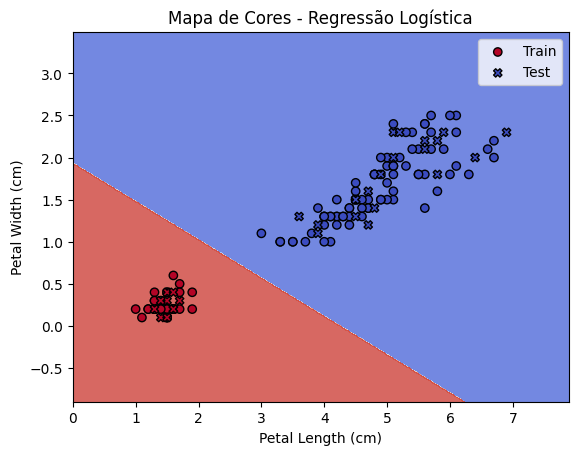

In [22]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.array(Z).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='X', cmap=plt.cm.coolwarm, label='Test')

plt.title("Mapa de Cores - Regressão Logística")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.legend()
plt.show()